**Libraries**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

**Titanic Data Set**

In [65]:
data=pd.read_csv('/content/Titanic-Dataset.csv')
data.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [67]:
data.isnull().mean()*100

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Embarked,0.224467


**Encoding Sex Column**

In [68]:
dummise_sex=pd.get_dummies(data['Sex']).astype(int)
dummise_sex


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [69]:
data=pd.concat([dummise_sex,data],axis=1)
data.head()

,female,male,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,S
1,1,0,1,1,female,38.0,1,0,71.2833,C
2,1,0,1,3,female,26.0,0,0,7.9250,S
3,1,0,1,1,female,35.0,1,0,53.1000,S
4,0,1,0,3,male,35.0,0,0,8.0500,S


In [70]:
data.drop(columns='Sex',inplace=True,axis=1)

In [71]:
data.drop(columns='male',axis=1,inplace=True)

In [72]:
data.head()

,female,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,1,3,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,0,3,35.0,0,0,8.0500,S


In [73]:
data.rename(columns={'female':"Gender"},inplace=True)
data.head()

,Gender,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,1,3,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,0,3,35.0,0,0,8.0500,S


**Handling Missing Values**

In [74]:
data.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [75]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data.Age.isnull().sum()
data.Embarked.isnull().sum()

0

**Encoding Embarked Column**

In [76]:
dummise_Embarked=pd.get_dummies(data['Embarked']).astype(int)
dummise_Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [77]:
data=pd.concat([dummise_Embarked,data],axis=1)
data.drop(columns='Embarked',axis=1,inplace=True)
data.head()

,C,Q,S,Gender,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,0,3,22.0,1,0,7.2500
1,1,0,0,1,1,1,38.0,1,0,71.2833
2,0,0,1,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,1,35.0,1,0,53.1000
4,0,0,1,0,0,3,35.0,0,0,8.0500


**EDA**

**Survival Rate By Gender**

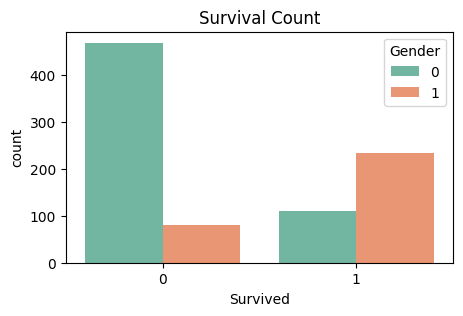

In [90]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=data,palette='Set2',hue='Gender')
plt.title('Survival Count')
plt.show()


**Survival Rate By Pclass**

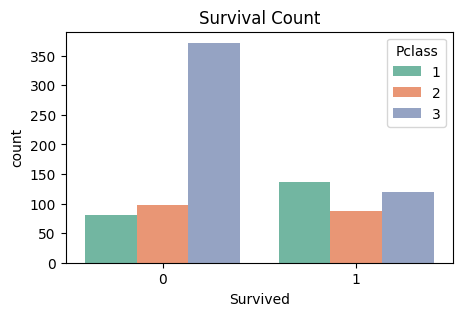

In [88]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived',data=data,palette='Set2',hue='Pclass')
plt.title('Survival Count')
plt.show()


**Age Distribution of Passengers**

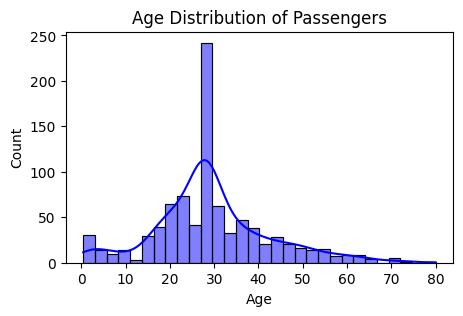

In [91]:
plt.figure(figsize=(5,3))
sns.histplot(data['Age'],bins=30,kde=True,color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Coorelation Heatmap**

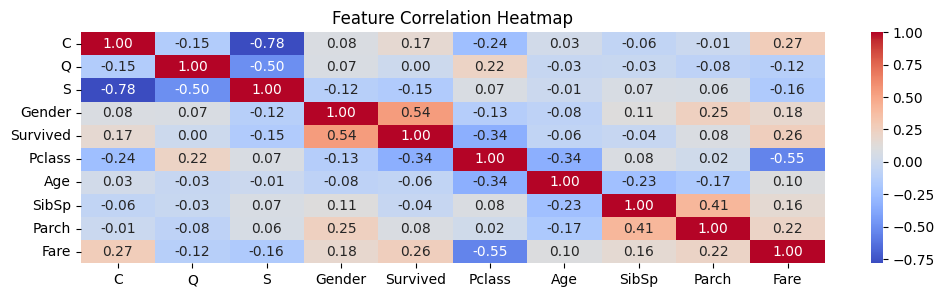

In [99]:
plt.figure(figsize=(12, 3))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


**Splitting**

In [48]:
x=data.drop(columns='Survived',axis=1)
y=data.Survived

In [49]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Standardization**

In [55]:
scaler = StandardScaler()

In [56]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Classifiers**

In [57]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [58]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

**Voting Ensemble**

In [59]:
vc = VotingClassifier(estimators=estimators,voting='hard')

In [60]:
vc.fit(x_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())])

**Prediction**

In [61]:
y_pred=vc.predict(x_test)

**Accuracy**

In [62]:
accuracy_train=vc.score(x_train,y_train)*100
accuracy_train

89.46629213483146

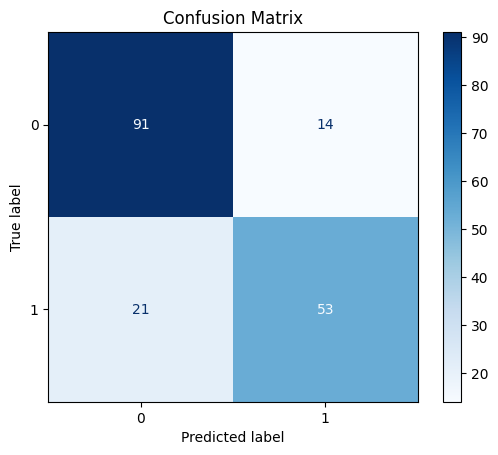

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
